In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

# Wczytanie danych

In [ ]:
df = pd.read_csv('laptop_price.csv', encoding='cp1250')

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.shape

(1303, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# Zmiana typów zmiennych

In [ ]:
# zmieniamy zmienne Weight i Ram na wartości float i int

In [ ]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [ ]:
df['Ram'] = df['Ram'].astype('int')

In [ ]:
df['Weight'] = df['Weight'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


In [ ]:
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00


In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [ ]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [ ]:
# zmieniamy typ zmiennych OpSys, Company i TypeName na category

In [ ]:
df['OpSys'] = df['OpSys'].astype('category')
df['Company'] = df['Company'].astype('category')
df['TypeName'] = df['TypeName'].astype('category')

In [ ]:
df.describe()

,laptop_ID,Inches,Ram,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992
std,381.172104,1.426304,5.084665,0.665475,699.009043
min,1.000000,10.100000,2.000000,0.690000,174.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000


In [ ]:
# sprawdzamy czy komputer o wadze < 1 nie jest błędem / jednorazowym przypadkiem

In [ ]:
df[df['Weight'] < 1].count()

laptop_ID           18
Company             18
Product             18
TypeName            18
Inches              18
ScreenResolution    18
Cpu                 18
Ram                 18
Memory              18
Gpu                 18
OpSys               18
Weight              18
Price_euros         18
dtype: int64

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# Rozdzielanie kolumn Memory, ScreenResolution, Cpu, Gpu

## Memory

In [ ]:
df[['Memory_1', 'Memory_2']]= df['Memory'].str.split(' + ', 1, expand=True)

In [ ]:
df[['Memory_size1', 'Memory_type1']] = df['Memory_1'].str.split(' ', 1, expand=True)
df["Memory_type1"]=df["Memory_type1"].str.replace("+","")
df["Memory_type1"]=df["Memory_type1"].str.strip(to_strip = None)

<ipython-input-93-9c1de58e2e73>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Memory_type1"]=df["Memory_type1"].str.replace("+","")


In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_1,Memory_2,Memory_size1,Memory_type1
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128GB SSD,None,128GB,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128GB Flash Storage,None,128GB,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256GB SSD,None,256GB,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512GB SSD,None,512GB,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256GB SSD,None,256GB,SSD


In [ ]:
df[['Memory_size2', 'Memory_type2']] = df['Memory_2'].str.split(' ', 1, expand=True)
df["Memory_type2"]=df["Memory_type2"].str.replace("+","")
df["Memory_type2"]=df["Memory_type2"].str.strip(to_strip = None)

<ipython-input-95-1aca804bbaa0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Memory_type2"]=df["Memory_type2"].str.replace("+","")


In [ ]:
df["Memory_size2"].fillna("0", inplace = True)

In [ ]:
df['Memory_size2'].value_counts()

0        1095
1TB       185
2TB        15
256GB       3
500GB       2
1.0TB       2
512GB       1
Name: Memory_size2, dtype: int64

In [ ]:
df['Memory_size1'] = df['Memory_size1'].str.replace('GB','')
df['Memory_size2'] = df['Memory_size2'].str.replace('GB','')

In [ ]:
def getGB1(row):
  gb = str(row['Memory_size1']).replace('.0','')
  if gb.endswith('TB'):
    gb1 = int(gb.replace('TB','')) * 1000
  else:
    gb1 = gb
  return gb1

In [ ]:
df['Memory_size1'] = df.apply(getGB1, axis=1).astype('int')

In [ ]:
def getGB2(row):
  gb = str(row['Memory_size2']).replace('.0','')
  if gb.endswith('TB'):
    gb1 = int(gb.replace('TB','')) * 1000
  else:
    gb1 = gb
  return gb1   

In [ ]:
df['Memory_size2'] = df.apply(getGB2, axis=1).astype('int')

## ScreenResolution

In [ ]:
def getResolution(row):
  screen = row['ScreenResolution']
  screen_spl = screen.split(' ')
  res = screen_spl[len(screen_spl)-1].split('x')
  return res[0], res[1]


In [ ]:
df[['ResolutionW', 'ResolutionH']] = df.apply(getResolution, axis=1, result_type='expand').astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   laptop_ID         1303 non-null   int64   
 1   Company           1303 non-null   category
 2   Product           1303 non-null   object  
 3   TypeName          1303 non-null   category
 4   Inches            1303 non-null   float64 
 5   ScreenResolution  1303 non-null   object  
 6   Cpu               1303 non-null   object  
 7   Ram               1303 non-null   int64   
 8   Memory            1303 non-null   object  
 9   Gpu               1303 non-null   object  
 10  OpSys             1303 non-null   category
 11  Weight            1303 non-null   float64 
 12  Price_euros       1303 non-null   float64 
 13  Memory_1          1303 non-null   object  
 14  Memory_2          208 non-null    object  
 15  Memory_size1      1303 non-null   int64   
 16  Memory_type1      1303 n

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,Memory_1,Memory_2,Memory_size1,Memory_type1,Memory_size2,Memory_type2,ResolutionW,ResolutionH
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,1.37,1339.69,128GB SSD,None,128,SSD,0,None,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,1.34,898.94,128GB Flash Storage,None,128,Flash Storage,0,None,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,1.86,575.00,256GB SSD,None,256,SSD,0,None,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,1.83,2537.45,512GB SSD,None,512,SSD,0,None,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,1.37,1803.60,256GB SSD,None,256,SSD,0,None,2560,1600


## Gpu

In [ ]:
def GpuCompany(row):
  gpu = row['Gpu']
  gpu_spl = gpu.split(' ')
  return gpu_spl[0]

In [ ]:
df['Gpu_company'] = df.apply(GpuCompany, axis=1).astype('category')

In [ ]:
df['Gpu_company'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_company, dtype: int64

## Cpu

In [ ]:
def getCpu(row):
  cpu = row['Cpu']
  cpu_spl = cpu.split(' ')
  return cpu_spl[len(cpu_spl)-1].replace('GHz', '')

In [ ]:
df['Cpu_freq'] = df.apply(getCpu, axis=1).astype('float')

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Memory_1,Memory_2,Memory_size1,Memory_type1,Memory_size2,Memory_type2,ResolutionW,ResolutionH,Gpu_company,Cpu_freq
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,128GB SSD,None,128,SSD,0,None,2560,1600,Intel,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,128GB Flash Storage,None,128,Flash Storage,0,None,1440,900,Intel,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,256GB SSD,None,256,SSD,0,None,1920,1080,Intel,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,512GB SSD,None,512,SSD,0,None,2880,1800,AMD,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,256GB SSD,None,256,SSD,0,None,2560,1600,Intel,3.1


In [ ]:
df['Memory_allsize'] = df['Memory_size1'] + df['Memory_size2']

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Memory_2,Memory_size1,Memory_type1,Memory_size2,Memory_type2,ResolutionW,ResolutionH,Gpu_company,Cpu_freq,Memory_allsize
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,None,128,SSD,0,None,2560,1600,Intel,2.3,128
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,None,128,Flash Storage,0,None,1440,900,Intel,1.8,128
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,None,256,SSD,0,None,1920,1080,Intel,2.5,256
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,None,512,SSD,0,None,2880,1800,AMD,2.7,512
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,None,256,SSD,0,None,2560,1600,Intel,3.1,256


# Wykresy

## Firma a cena

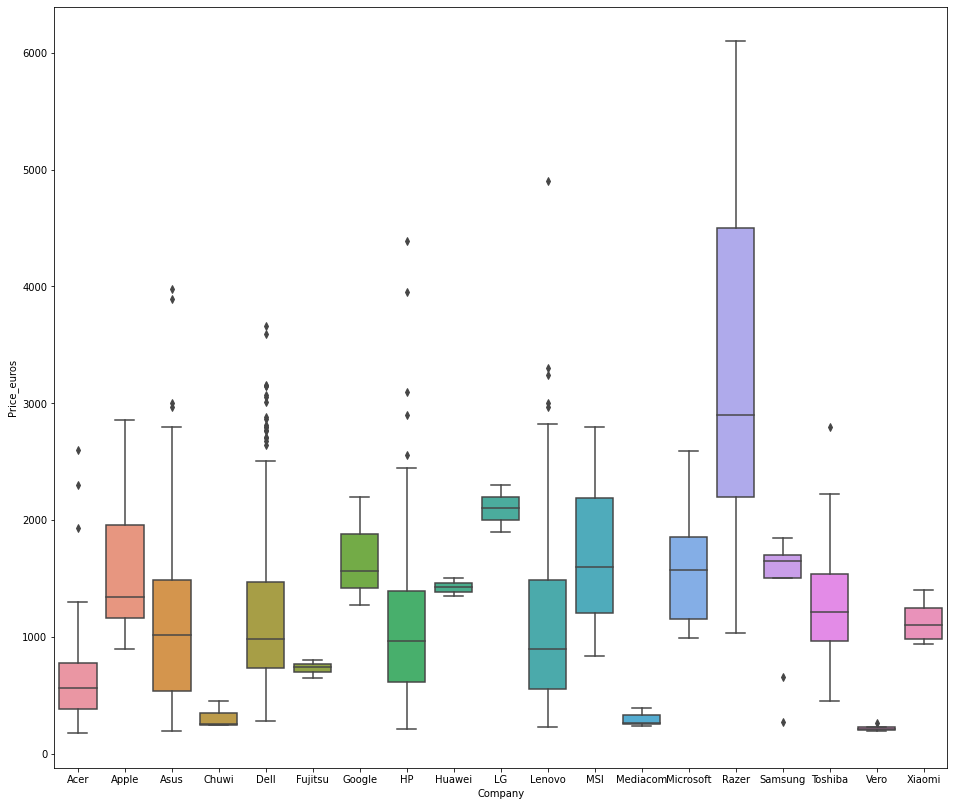

In [ ]:
plt.figure(figsize=(16,14))
sns.boxplot(x='Company', y='Price_euros', data=df)

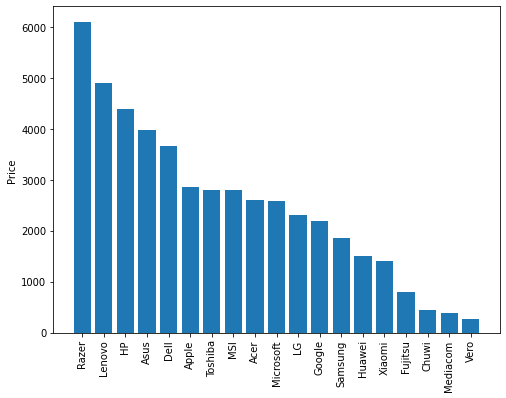

In [390]:
df2=df.sort_values("Price_euros", ascending=False)
fig, ax=plt.subplots(figsize=(8,6))
ax.bar(df2['Company'], df2['Price_euros'])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Price')
plt.show()

## Rozkład ceny

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


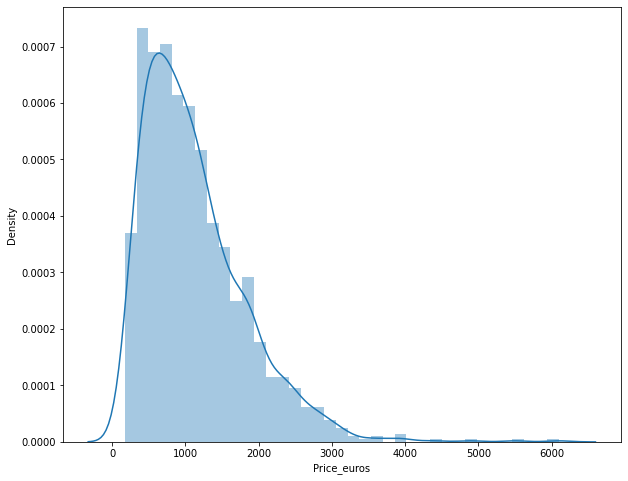

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['Price_euros'])

## Typ pamięci a cena

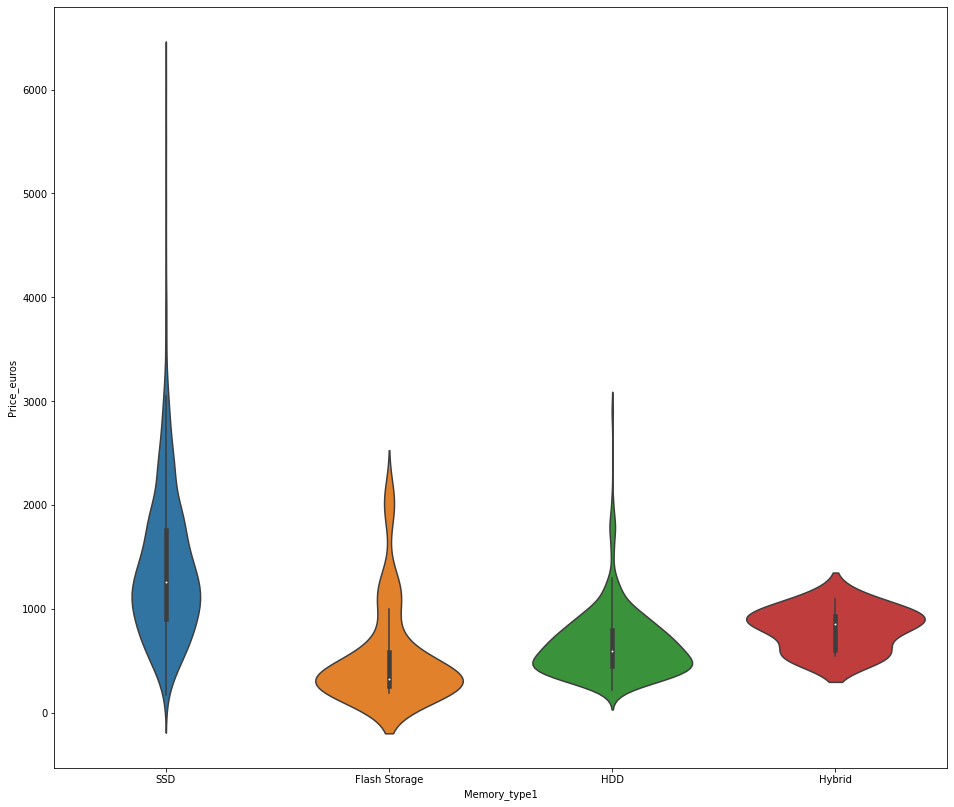

In [ ]:
plt.figure(figsize=(16,14))
sns.violinplot(x='Memory_type1', y='Price_euros', data=df)

## Mapa ciepła

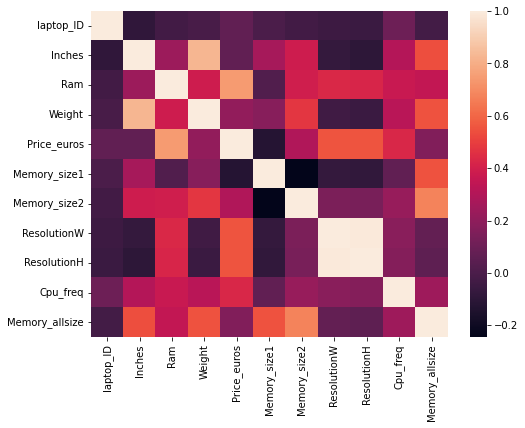

In [ ]:
df_corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_corr)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   laptop_ID         1303 non-null   int64   
 1   Company           1303 non-null   category
 2   Product           1303 non-null   object  
 3   TypeName          1303 non-null   category
 4   Inches            1303 non-null   float64 
 5   ScreenResolution  1303 non-null   object  
 6   Cpu               1303 non-null   object  
 7   Ram               1303 non-null   int64   
 8   Memory            1303 non-null   object  
 9   Gpu               1303 non-null   object  
 10  OpSys             1303 non-null   category
 11  Weight            1303 non-null   float64 
 12  Price_euros       1303 non-null   float64 
 13  Memory_1          1303 non-null   object  
 14  Memory_2          208 non-null    object  
 15  Memory_size1      1303 non-null   int64   
 16  Memory_type1      1303 n

# Definiowanie zmiennych X, y

In [ ]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Memory_1', 'Memory_2', 'Memory_size1', 'Memory_type1',
       'Memory_size2', 'Memory_type2', 'ResolutionW', 'ResolutionH',
       'Gpu_company', 'Cpu_freq', 'Memory_allsize'],
      dtype='object')

In [391]:
X = df[['Inches', 'Ram','ResolutionW', 'ResolutionH',
       'Cpu_freq', 'Memory_allsize', 'Weight']]

In [392]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Inches          1303 non-null   float64
 1   Ram             1303 non-null   int64  
 2   ResolutionW     1303 non-null   int64  
 3   ResolutionH     1303 non-null   int64  
 4   Cpu_freq        1303 non-null   float64
 5   Memory_allsize  1303 non-null   int64  
 6   Weight          1303 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 71.4 KB


In [393]:
X.head()

,Inches,Ram,ResolutionW,ResolutionH,Cpu_freq,Memory_allsize,Weight
0,13.3,8,2560,1600,2.3,128,1.37
1,13.3,8,1440,900,1.8,128,1.34
2,15.6,8,1920,1080,2.5,256,1.86
3,15.4,16,2880,1800,2.7,512,1.83
4,13.3,8,2560,1600,3.1,256,1.37


In [394]:
y = df['Price_euros']

In [395]:
# podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=123)

# Regresja liniowa

## Zbiór testowy i treningowy

In [396]:
# model regresji liniowej na zbiorze treningowym
model_lin1 = LinearRegression()
model_lin1.fit(X_train, y_train)

LinearRegression()

In [397]:
# predykcja na zbiorze testowym
y_pred_test = model_lin1.predict(X_test)

In [398]:
# oblicz współczynnik r2
r2_score(y_test, y_pred_test)

0.7517726220038725

## Cały zbiór

In [399]:
model_lin1.fit(X, y)

LinearRegression()

In [400]:
y_pred = model_lin1.predict(X)

In [401]:
r2_score(y, y_pred)

0.6649389529008016

# Drzewo decyzyjne

In [402]:
model_tree=DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [403]:
y_pred_test=model_tree.predict(X_test)

In [404]:
r2_score(y_test, y_pred_test)

0.761234306938578

In [405]:
model_tree.get_depth()

23

# Featuring importance

In [406]:
for importance, name in sorted(zip(model_tree.feature_importances_, X_train.columns), reverse=True):
  print(name, importance)

Ram 0.5399553306805952
Weight 0.1780881851815094
Cpu_freq 0.1326753502911649
Memory_allsize 0.056586476982448605
ResolutionH 0.05107625434502545
Inches 0.026856242879125275
ResolutionW 0.014762159640131245


##